Some cool plots derived from the results of the scripts

## Correlations of the importance vectors 

We have an importance vector for each transition in the cell differentiation tree.
We have calculated the correlations of each pair of importance vectors and stored them in a dictionary

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.cluster.hierarchy as sch

In [233]:
fn = '/home/pol/test_6770919.out'

In [234]:
exec('dico = ' + open(fn).readlines()[0])

We turn the correlations to distances by $dist(x,y) = 1 - corr(x,y)$ so that we can cluster the "edges" later on.

In [245]:
tt = dict((k, n) for n, k in enumerate([(i, j) for i in range(6) for j in range(i+1, 6)]))
tt

{(0, 1): 0,
 (0, 2): 1,
 (0, 3): 2,
 (0, 4): 3,
 (0, 5): 4,
 (1, 2): 5,
 (1, 3): 6,
 (1, 4): 7,
 (1, 5): 8,
 (2, 3): 9,
 (2, 4): 10,
 (2, 5): 11,
 (3, 4): 12,
 (3, 5): 13,
 (4, 5): 14}

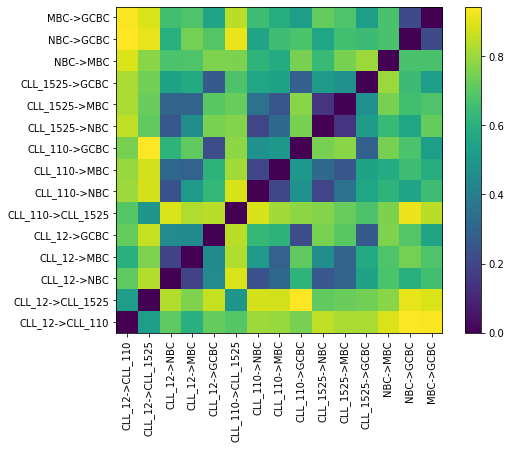

In [235]:
mat = np.zeros((15, 15))
s = 6
for i in range(s):
    for j in range(1 + i, s):
        for k in range(s):
            for l in range(1 + k, s):
                corr = dico.get('{}_{}__{}_{}'.format(i, j, k, l), (1, 1))[0]
                mat[t[i, j], t[k, l]] = 1-abs(corr)

for i in range(15):
    for j in range(15):
        if mat[i, j] > 0.9999:
            mat[i, j] = 0
        mat[j, i] = mat[i, j]

plt.figure(figsize=(8, 6))
plt.imshow((mat), origin='lower')
cells = ['CLL_12', 'CLL_110', 'CLL_1525', 'NBC', 'MBC', 'GCBC']
plt.xticks(range(15), ['{}->{}'.format(cells[i], cells[j]) for i in range(s) for j in range(i + 1, s)], rotation=90)
plt.yticks(range(15), ['{}->{}'.format(cells[i], cells[j]) for i in range(s) for j in range(i + 1, s)])
#plt.xticks(range(36), ['{}->{}'.format(i, j) for i in range(s) for j in range(s)], rotation=90)
#plt.yticks(range(36), ['{}->{}'.format(i, j) for i in range(s) for j in range(s)])
plt.colorbar()

We cluster the edges based on the distance derived from the correlation

/home/pol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  
/home/pol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


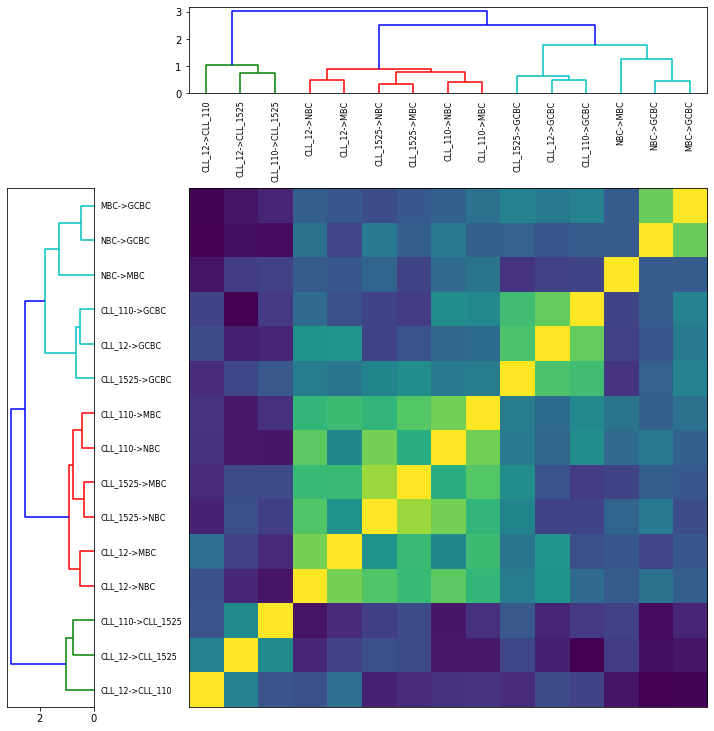

In [237]:
labels = ['{}->{}'.format(cells[i], cells[j]) for i in range(s) for j in range(i+1, s)]

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_axes([0.09,0.1,0.1,0.6])

Y = sch.linkage(mat, method='ward')
Z1 = sch.dendrogram(Y, orientation='left')

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.81,0.6,0.1])
Y = sch.linkage(mat, method='ward')
Z2 = sch.dendrogram(Y)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = mat[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap='viridis_r')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

_ = ax2.set_xticklabels(np.array(labels)[idx1], rotation=90, size=8)
_ = ax1.set_yticklabels(np.array(labels)[idx2], size=8)

## Jaccard Index of most important regions

Now we consider a different approach to measure the distance between edges.
For each transition, we look for the 20 (this threshold can be changed) regions of the genome with higher importance.
We calculate the Jaccard Index for these sets for every pair of transitions.

In [238]:
gn = '/home/pol/Documents/gn.txt'

In [239]:
exec('dicoo = ' + open(gn).readlines()[0])

Again, we turn the Jaccard Index measure to a distance by $dist(x,y) = 1 - J(x,y)$ so that we can perform a clustering later on.

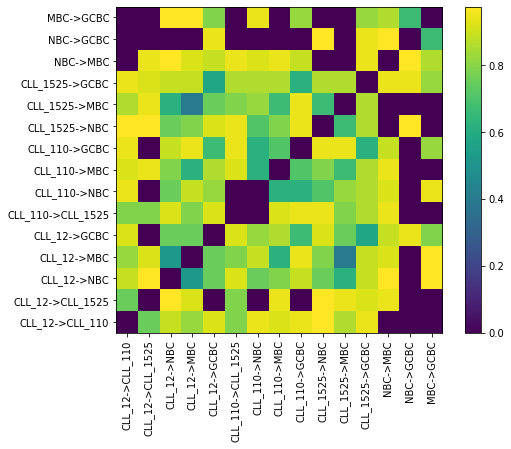

In [240]:
mat = np.zeros((15, 15))
s = 6
for i in range(s):
    for j in range(1 + i, s):
        for k in range(s):
            for l in range(1 + k, s):
                mat[t[i, j], t[k, l]] = 1-abs(dicoo.get('{}->{}:{}->{}'.format(i, j, k, l), 1.))

for i in range(15):
    for j in range(15):
        if mat[i, j] > 0.9999:
            mat[i, j] = 0
        mat[j, i] = mat[i, j]

plt.figure(figsize=(8, 6))
plt.imshow((mat), origin='lower')
cells = ['CLL_12', 'CLL_110', 'CLL_1525', 'NBC', 'MBC', 'GCBC']
plt.xticks(range(15), ['{}->{}'.format(cells[i], cells[j]) for i in range(s) for j in range(i + 1, s)], rotation=90)
plt.yticks(range(15), ['{}->{}'.format(cells[i], cells[j]) for i in range(s) for j in range(i + 1, s)])
#plt.xticks(range(36), ['{}->{}'.format(i, j) for i in range(s) for j in range(s)], rotation=90)
#plt.yticks(range(36), ['{}->{}'.format(i, j) for i in range(s) for j in range(s)])
plt.colorbar()

/home/pol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys
/home/pol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':


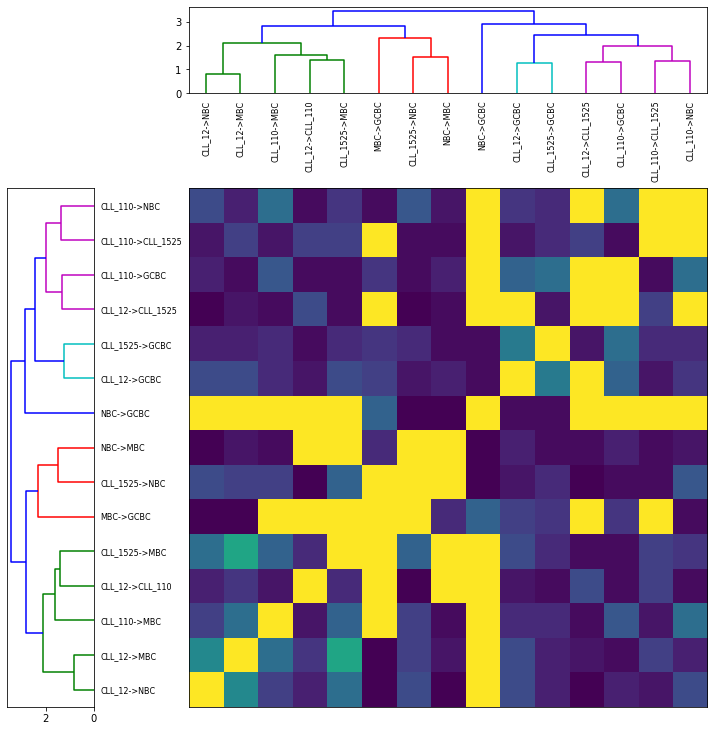

In [241]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_axes([0.09,0.1,0.1,0.6])

Y = sch.linkage(mat, method='ward')
Z1 = sch.dendrogram(Y, orientation='left')

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.81,0.6,0.1])
Y = sch.linkage(mat, method='ward')
Z2 = sch.dendrogram(Y)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = mat[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap='viridis_r')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

_ = ax2.set_xticklabels(np.array(labels)[idx1], rotation=90, size=8)
_ = ax1.set_yticklabels(np.array(labels)[idx2], size=8)


## Graphs

Now let's look at how the clustering of the edges translates into the cell differentiation graph. Here we do that for the data obtained using the Jaccard Index induced metric.

/home/pol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


array([1, 1, 1, 1, 1, 2, 2, 2, 5, 3, 3, 4, 4, 4, 4], dtype=int32)

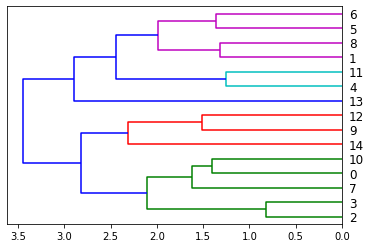

In [246]:
Y = sch.linkage(mat, method='ward')
Z1 = sch.dendrogram(Y, orientation='left')
idx1 = Z1['leaves']

assignments = sch.fcluster(Y, 5, criterion='maxclust')
assignments[idx1]

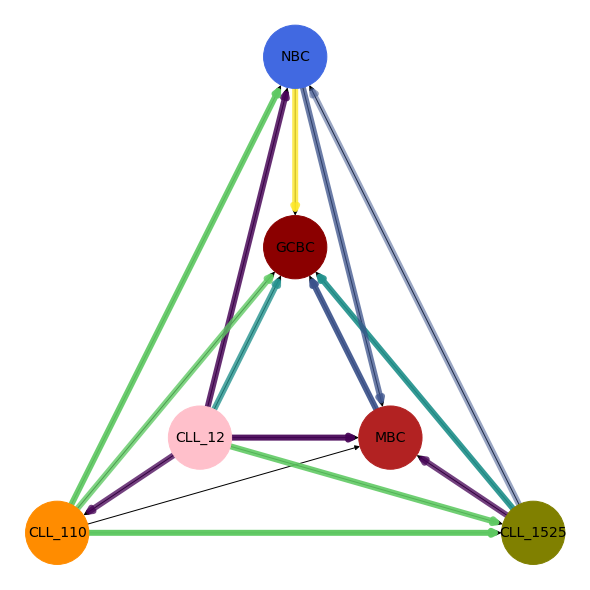

In [247]:
kas = ['CLL_12', 'CLL_110', 'CLL_1525', 'NBC', 'MBC', 'GCBC']
G = nx.DiGraph([(kas[i], kas[j]) for i in range(len(kas)) for j in range(i + 1, len(kas))])

pos = {'NBC'  : [ 0, 10],
       'GCBC' : [ 0,  8],
       'MBC'  : [ 2,  6],
       'CLL_12'  : [-2,  6],
       'CLL_1525': [ 5,  5],
       'CLL_110': [-5,  5],
      }

node_sizes = [4000 for i in range(len(G))]

M = G.number_of_edges()
#edge_colors = range(2, M + 2)
edge_colors = assignments
#edge_alphas = [(5 + i) / (M + 4) for i in range(M)]


plt.figure(figsize=(8, 8))
nodes = nx.draw(G, pos, node_size=node_sizes, 
                               node_color=['pink', 'darkorange', 'olive', 'royalblue', 'firebrick',
                                           'darkred'],
                              font_size=14, with_labels=True)

edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.viridis, width=6)

# set alpha value for each edge
for i in range(6):
    for j in range(i+1, 6):
        edges[tt[i,j]].set_alpha(mat[i,j])

pc = mpl.collections.PatchCollection(edges, cmap='viridis')
pc.set_array(edge_colors)
#plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()